In [52]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Input

In [ ]:
# Load dataset
data = pd.read_csv('candy.csv')

In [54]:
# Extract features and target
X = data.drop(columns=["competitorname", "winpercent"]).values
y = data["winpercent"].values

In [55]:
# Manually perform Min-Max scaling (0-1 normalization)
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

In [56]:
# Reshape the data for CNN input: (samples, num_features, 1)
num_samples, num_features = X_scaled.shape
X_reshaped = X_scaled.reshape(num_samples, num_features, 1)

In [57]:
# Manually split the data into training and testing sets (80-20 split)
split_index = int(0.8 * num_samples)
X_train, X_test = X_reshaped[:split_index], X_reshaped[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [58]:
# model architecture
model = Sequential([
    Input(shape=(num_features, 1)),
    Conv1D(32, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

In [59]:
# Compile the model with a lower learning rate for better convergence
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model for 50 epochs
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 630ms/step - loss: 2840.3982 - val_loss: 2915.6077
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2890.7136 - val_loss: 2895.5586
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2832.0115 - val_loss: 2874.0779
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2754.5056 - val_loss: 2851.3494
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2845.1536 - val_loss: 2827.1965
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2756.9524 - val_loss: 2800.6130
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2756.3408 - val_loss: 2771.7808
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2795.7759 - val_loss: 2740.1526
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2686.5510 - val_loss: 2705.6743
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2618.1987 - val_loss: 2668.1858
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2615.5771 - val_loss: 2627.2908
Epoch 12/50
2/2 ━━

In [61]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f'Test Loss: {test_loss}')

Test Loss: 135.22216796875


In [62]:
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


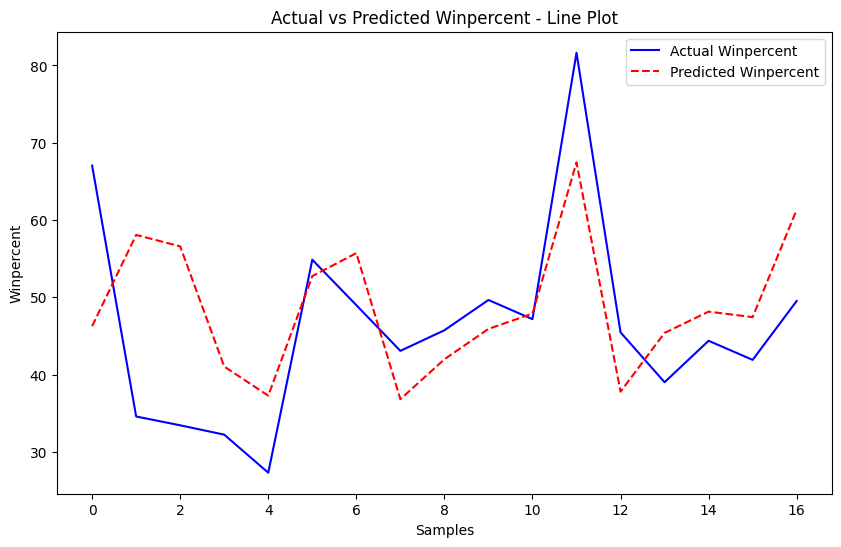

In [65]:
# Plot the actual vs predicted values using a line plot
plt.figure(figsize=(10,6))
plt.plot(y_test, label="Actual Winpercent", color='blue')
plt.plot(y_pred, label="Predicted Winpercent", color='red', linestyle='dashed')
plt.xlabel("Samples")
plt.ylabel("Winpercent")
plt.title("Actual vs Predicted Winpercent - Line Plot")
plt.legend()
plt.show()

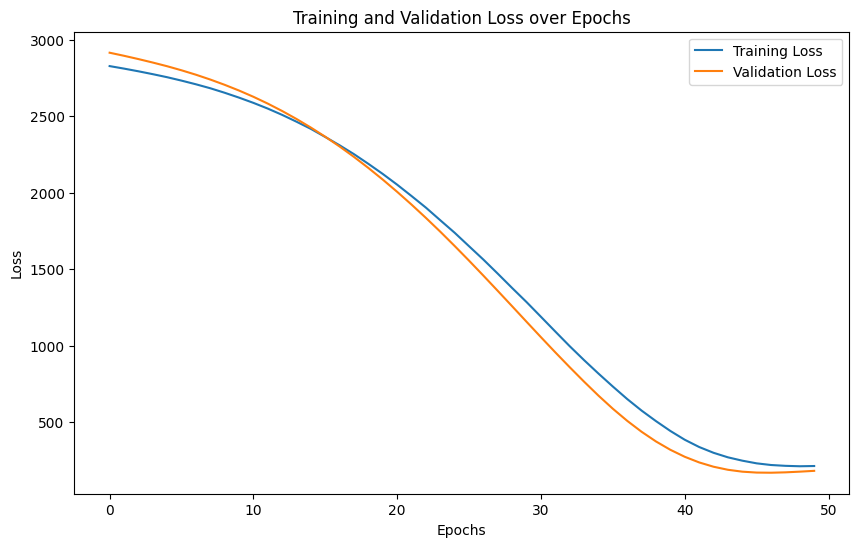

In [64]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.show()